In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("darkgrid")
%matplotlib inline

In [6]:
data = pd.read_csv("../data/eng.train", header=None, names=["Token", "POS", "Chunk", "Label"], delimiter=' ')
data.head()

,Token,POS,Chunk,Label
0,-DOCSTART-,-X-,O,O
1,EU,NNP,I-NP,B-ORG
2,rejects,VBZ,I-VP,O
3,German,JJ,I-NP,B-MISC
4,call,NN,I-NP,O


In [7]:
data= data.dropna()

In [8]:
data["TokenLen"] = data["Token"].apply(len)
data= data[1:]

In [9]:
data["Coarse-label"] = data["Label"].apply(lambda x: x.split("-")[-1])
data.head()

,Token,POS,Chunk,Label,TokenLen,Coarse-label
1,EU,NNP,I-NP,B-ORG,2,ORG
2,rejects,VBZ,I-VP,O,7,O
3,German,JJ,I-NP,B-MISC,6,MISC
4,call,NN,I-NP,O,4,O
5,to,TO,I-VP,O,2,O


In [10]:
grouped_data = data.groupby("Coarse-label")

Basic Stats for group for PER
Mode of Token Length ModeResult(mode=array([5]), count=array([2402]))
Mean of the Token Length 6.0608375269590224
Max: 18 and min: 1 
0 0
Basic Stats for group for MISC
Mode of Token Length ModeResult(mode=array([7]), count=array([973]))
Mean of the Token Length 6.45199216198563
Max: 21 and min: 1 
0 0
Basic Stats for group for ORG
Mode of Token Length ModeResult(mode=array([7]), count=array([1516]))
Mean of the Token Length 6.284588528678304
Max: 18 and min: 1 
0 0
Basic Stats for group for O
Mode of Token Length ModeResult(mode=array([1]), count=array([33128]))
Mean of the Token Length 4.071028026279835
Max: 61 and min: 1 
0 0
Basic Stats for group for LOC
Mode of Token Length ModeResult(mode=array([6]), count=array([1759]))
Mean of the Token Length 6.255393515728577
Max: 27 and min: 1 
0 0


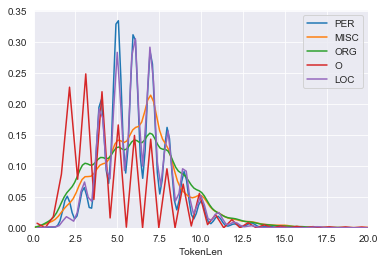

In [11]:
my_palette = sns.color_palette("muted")
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
# fig, axes = plt.subplots(1, 5, figsize=(10, 3), sharey=True, dpi = 200)
i,j = 0,0
for group in list(set(data["Coarse-label"])):
    print("Basic Stats for group for {0}".format(group))
    subset = grouped_data.get_group(group)
    print("Mode of Token Length", stats.mode(subset["TokenLen"]))
    print("Mean of the Token Length", np.mean(subset["TokenLen"]))
    print("Max: {0} and min: {1} ".format(max(subset["TokenLen"]), min(subset["TokenLen"])))
    print(i, j)
    sns.distplot(subset["TokenLen"], hist=False, kde=True,label = group)
    plt.legend()
    plt.xlim(0,20)
#     sns.boxplot(subset["TokenLen"], ax=axes[i,j])
#     i += 1
#     if(j == 3):
#         j = 0
#         i += 1

In [30]:
data = pd.read_csv("../data/eng.train", 
                   header=None, 
                   names=["Token","POS", "Chunk", "Label"], 
                   delimiter=' ', skip_blank_lines = False)

data['EOS'] = pd.isnull(data["Token"])
data.head()

,Token,POS,Chunk,Label,EOS
0,-DOCSTART-,-X-,O,O,False
1,NaN,NaN,NaN,NaN,True
2,EU,NNP,I-NP,B-ORG,False
3,rejects,VBZ,I-VP,O,False
4,German,JJ,I-NP,B-MISC,False


In [31]:
import math
from tqdm import tqdm

position_in_sen = []
temp = 0
for row in tqdm(range(0,len(data))):
#     print(data.iloc[row])
    position_in_sen.append(temp)
    if data.iloc[row]["EOS"] == True:
        temp = 0
    else:
        temp = temp+1

100%|██████████| 219554/219554 [00:35<00:00, 6121.95it/s]


In [32]:
data["position"] = position_in_sen
data.head()

,Token,POS,Chunk,Label,EOS,position
0,-DOCSTART-,-X-,O,O,False,0
1,NaN,NaN,NaN,NaN,True,1
2,EU,NNP,I-NP,B-ORG,False,0
3,rejects,VBZ,I-VP,O,False,1
4,German,JJ,I-NP,B-MISC,False,2


In [33]:
data = data.dropna(subset=["Label", "Token"])

In [34]:
data["Coarse-label"] = data["Label"].apply(lambda x: x.split("-")[-1])
data.head()

,Token,POS,Chunk,Label,EOS,position,Coarse-label
0,-DOCSTART-,-X-,O,O,False,0,O
2,EU,NNP,I-NP,B-ORG,False,0,ORG
3,rejects,VBZ,I-VP,O,False,1,O
4,German,JJ,I-NP,B-MISC,False,2,MISC
5,call,NN,I-NP,O,False,3,O


In [35]:
grouped_data = data.groupby("Coarse-label")

Basic Stats for group for PER
Mode of Position in a sentence  ModeResult(mode=array([1]), count=array([1702]))
Mean of the Position in a sentence  7.91157440690151
Max: 76 and min: 0 
0 0
Basic Stats for group for MISC
Mode of Position in a sentence  ModeResult(mode=array([0]), count=array([502]))
Mean of the Position in a sentence  10.33768778576094
Max: 52 and min: 0 
0 0
Basic Stats for group for ORG
Mode of Position in a sentence  ModeResult(mode=array([0]), count=array([2455]))
Mean of the Position in a sentence  7.681596009975062
Max: 56 and min: 0 
0 0
Basic Stats for group for O
Mode of Position in a sentence  ModeResult(mode=array([1]), count=array([9954]))
Mean of the Position in a sentence  11.915226650350771
Max: 112 and min: 0 
0 0
Basic Stats for group for LOC
Mode of Position in a sentence  ModeResult(mode=array([0]), count=array([1581]))
Mean of the Position in a sentence  8.823309629986742
Max: 53 and min: 0 
0 0


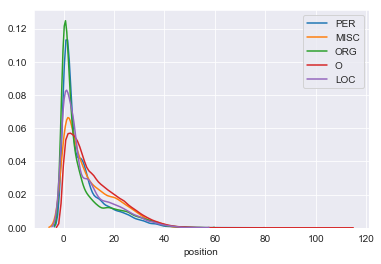

In [36]:
for group in list(set(data["Coarse-label"])):
    print("Basic Stats for group for {0}".format(group))
    subset = grouped_data.get_group(group)
    print("Mode of Position in a sentence ", stats.mode(subset["position"]))
    print("Mean of the Position in a sentence ", np.mean(subset["position"]))
    print("Max: {0} and min: {1} ".format(max(subset["position"]), min(subset["position"])))
    print(i, j)
    sns.distplot(subset["position"], hist=False, kde=True,label = group)
    plt.legend()

In [ ]:
grouped_data = data.groupby("Label")

In [ ]:
for group in list(set(data["Label"])):
    print("Basic Stats for group for {0}".format(group))
    subset = grouped_data.get_group(group)
    print("Mode of Position in a sentence ", stats.mode(subset["position"]))
    print("Mean of the Position in a sentence ", np.mean(subset["position"]))
    print("Max: {0} and min: {1} ".format(max(subset["position"]), min(subset["position"])))
    print(i, j)
    sns.distplot(subset["position"], hist=False, kde=True,label = group)
#     plt.xlim(0,20)    
    plt.legend()


In [37]:
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [38]:
cramers_v(data["Coarse-label"], data["POS"])

0.4346780384911229